Ok, so we are going to create an app like interface such that 
- when the user enters a particular match he gets all the statistics related to that particular match
- when user enters a particular batsman, he gets all the important statistics concerned with the batsman and same for the bowler

### Importing the datasets and converting them to a pandas dataframe

##### Import all necessary libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
match_number = input('Enter the match number')

In [9]:
player_name = str(input('Enter name of player'))

#### Individual Player statistics
- Pandas
- Numpy
- Matplotlib/Seaborn

#### Steps
##### batting statistics 
- strike rate across various matches
- score in each match
- average score
##### bowling statistics
- economy
- which batsman outed most
- average wickets

### Batting Statistics

In [19]:
df = pd.read_csv('each_ball_records.csv')
# now let us find out strike rate of the player
names = player_name.split()
capitalized = [word.capitalize() for word in names]
name = ' '.join(capitalized)
df

,match_no,ballnumber,inningno,over,outcome,batter,bowler,comment,score
0,1,1,1,0.1,0,Devon Conway,Mohammed Shami,"Mohammed Shami to Devon Conway, no run,",0
1,1,2,1,0.2,1lb,Devon Conway,Mohammed Shami,"Mohammed Shami to Devon Conway, 1 leg bye,",1
2,1,3,1,0.3,0,Ruturaj Gaikwad,Mohammed Shami,"Mohammed Shami to Ruturaj Gaikwad, no run,",0
3,1,4,1,0.4,1,Ruturaj Gaikwad,Mohammed Shami,"Mohammed Shami to Ruturaj Gaikwad, 1 run,",1
4,1,5,1,0.5,0,Devon Conway,Mohammed Shami,"Mohammed Shami to Devon Conway, no run,",0
...,...,...,...,...,...,...,...,...,...
17858,74,95,2,0.1,0,Wriddhiman Saha,Deepak Chahar,"Deepak Chahar to Wriddhiman Saha, no run,",0
17859,74,96,2,0.2,0,Wriddhiman Saha,Deepak Chahar,"Deepak Chahar to Wriddhiman Saha, no run,",0
17860,74,97,2,0.3,1,Wriddhiman Saha,Deepak Chahar,"Deepak Chahar to Wriddhiman Saha, 1 run,",1
17861,74,98,2,0.4,1,Shubman Gill,Deepak Chahar,"Deepak Chahar to Shubman Gill, 1 run,",1


In [12]:
player_df = df.loc[(df['batter'] == name) | (df['bowler'] == name)]
player_df

,match_no,ballnumber,inningno,over,outcome,batter,bowler,comment,score
121,1,1,2,0.1,0,Wriddhiman Saha,Deepak Chahar,"Deepak Chahar to Wriddhiman Saha, no run,",0
122,1,2,2,0.2,0,Wriddhiman Saha,Deepak Chahar,"Deepak Chahar to Wriddhiman Saha, no run,",0
123,1,3,2,0.3,0,Wriddhiman Saha,Deepak Chahar,"Deepak Chahar to Wriddhiman Saha, no run,",0
124,1,4,2,0.4,1,Wriddhiman Saha,Deepak Chahar,"Deepak Chahar to Wriddhiman Saha, 1 run,",1
127,1,7,2,1.1,6,Wriddhiman Saha,Tushar Deshpande,"Tushar Deshpande to Wriddhiman Saha, Six,",6
...,...,...,...,...,...,...,...,...,...
17727,74,81,1,13.6,w,Wriddhiman Saha,Deepak Chahar,"Deepak Chahar to Wriddhiman Saha, no run, ...",0
17858,74,95,2,0.1,0,Wriddhiman Saha,Deepak Chahar,"Deepak Chahar to Wriddhiman Saha, no run,",0
17859,74,96,2,0.2,0,Wriddhiman Saha,Deepak Chahar,"Deepak Chahar to Wriddhiman Saha, no run,",0
17860,74,97,2,0.3,1,Wriddhiman Saha,Deepak Chahar,"Deepak Chahar to Wriddhiman Saha, 1 run,",1


22.941176470588236
MultiIndex([('score',   'sum'),
            ('score',  'mean'),
            ('score', 'count')],
           )
         score                 strike rate batting average
           sum      mean count                            
match_no                                                  
1           28  1.647059    17  164.705882       22.941176
7           14  2.000000     7  200.000000       22.941176
13          23  1.150000    20  115.000000       22.941176
18          31  1.631579    19  163.157895       22.941176
23           5  1.250000     4  125.000000       22.941176
30          43  1.228571    35  122.857143       22.941176
35           4  0.571429     7   57.142857       22.941176
39          11  1.100000    10  110.000000       22.941176
44           0  0.000000     6    0.000000       22.941176
48          43  1.264706    34  126.470588       22.941176
51          84  1.866667    45  186.666667       22.941176
57           2  0.400000     5   40.000000   

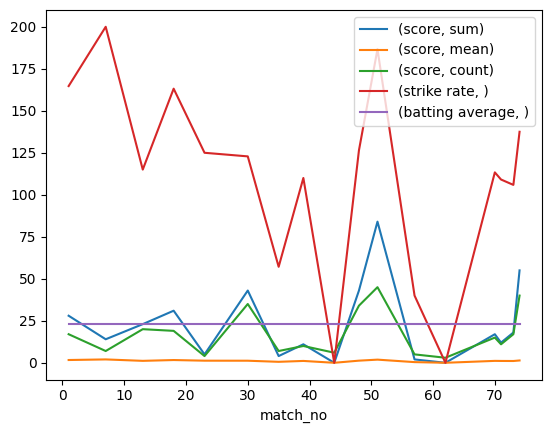

In [46]:
# let us find out the number of matches that he played
unique_values = player_df['match_no'].nunique()
grouped = player_df.groupby('match_no')
group_mean = grouped['score'].mean()
aggregation = grouped.agg({'score' : ['sum','mean','count']})
batting_average = player_df['score'].sum() / unique_values
print(batting_average)
print(aggregation.columns)
aggregation['strike rate'] = (aggregation[('score','sum')].div(aggregation[('score','count')]))*100
#print(aggregation.columns)
# count is the number of balls faced by the batsman
#print(super_group_mean)
aggregation['batting average'] = batting_average
print(aggregation)
aggregation.plot()
plt.legend(title="")
plt.show()

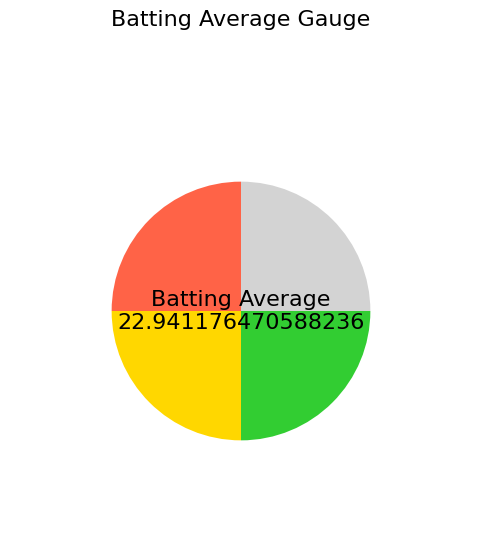

In [32]:
import matplotlib.patches as patches
fig, ax = plt.subplots(figsize=(6, 6))

colors = ['lightgray', 'limegreen', 'gold', 'tomato']

wedges = ax.pie([20, 20, 20, 20], colors=colors, radius=0.7,
                startangle=90, counterclock=False, wedgeprops={'linewidth': 1, 'linestyle': 'solid'})

ax.add_patch(plt.Circle((0, 0), 0.5, color='white', zorder=0))

ax.annotate(f'Batting Average\n{batting_average}', (0, 0), fontsize=16, color='black',ha='center', va='center')

ax.set_aspect('equal')

plt.title('Batting Average Gauge', fontsize=16, y=1.1)

ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('')
ax.set_ylabel('')

plt.show()

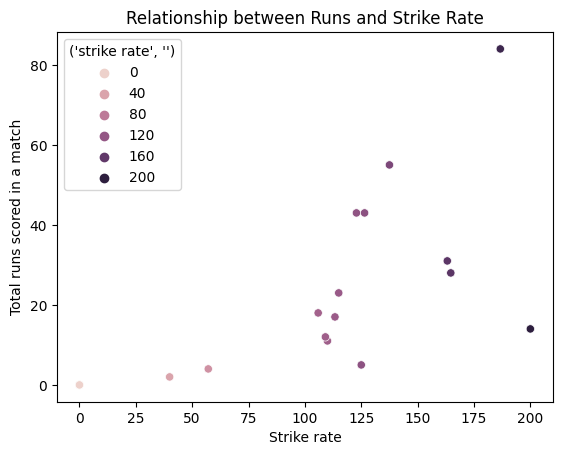

In [81]:
# can we ask whether there is any relation between the number of runs scored in the match and the strike rate of the batter in that match
# can we ask whether there is any relation between the number of balls faced and the number of runs scored for the particular match?
#print(aggregation.columns)
selected_columns = aggregation[('score', 'sum')]
sns.scatterplot(data=aggregation, x=('strike rate', ''), y=selected_columns, hue=('strike rate', ''))

plt.xlabel('Strike rate')
plt.ylabel('Total runs scored in a match')
plt.title('Relationship between Runs and Strike Rate')

plt.show()

<Axes: xlabel='Runs scored in the match', ylabel='number of balls faced in the match'>

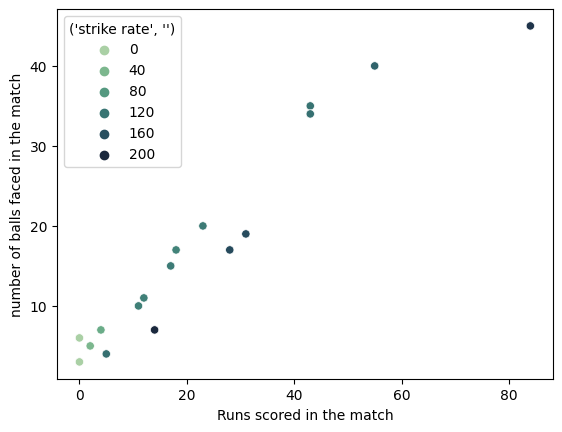

In [86]:
columns = aggregation[('score', 'sum')]
columns2 = aggregation[('score', "count")]

plt.xlabel('Runs scored in the match')
plt.ylabel('number of balls faced in the match')

sns.scatterplot(data=aggregation,x=columns, y=columns2, hue=('strike rate', ''), palette="ch:r=-.5,l=.75")
#sns.jointplot(data=aggregation, x='strike_rate', y='batting_average', kind="hist")

MergeError: Not allowed to merge between different levels. (2 levels on the left, 1 on the right)

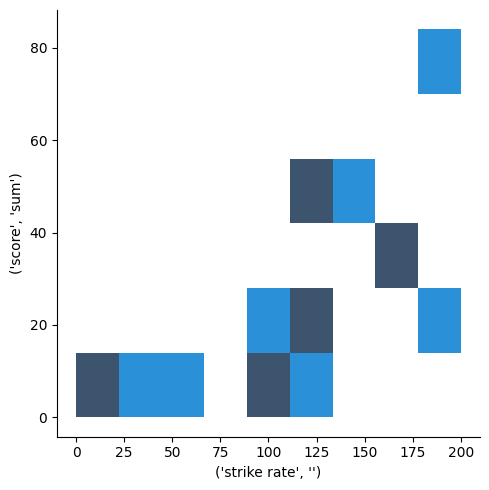

In [96]:
sns.displot(aggregation, x=('strike rate', ''), y=selected_columns)

In [98]:
# let us find out the relation between the number of boundaries and the over number
boundary_df = df.loc[(df['score'] == 4) | (df['score']==6)]
boundary_df

,match_no,ballnumber,inningno,over,outcome,batter,bowler,comment,score
6,1,7,1,1.1,4,Ruturaj Gaikwad,Hardik Pandya,"Hardik Pandya to Ruturaj Gaikwad, Four,",4
8,1,9,1,1.3,4,Ruturaj Gaikwad,Hardik Pandya,"Hardik Pandya to Ruturaj Gaikwad, Four,",4
18,1,19,1,3.1,6,Ruturaj Gaikwad,Josh Little,"Josh Little to Ruturaj Gaikwad, Six,",6
19,1,20,1,3.2,4,Ruturaj Gaikwad,Josh Little,"Josh Little to Ruturaj Gaikwad, Four,",4
22,1,23,1,3.5,4,Moeen Ali,Josh Little,"Josh Little to Moeen Ali, Four,",4
...,...,...,...,...,...,...,...,...,...
17840,74,77,2,12.1,6,Ambati Rayudu,Mohit Sharma,"Mohit Sharma to Ambati Rayudu, Six,",6
17841,74,78,2,12.2,4,Ambati Rayudu,Mohit Sharma,"Mohit Sharma to Ambati Rayudu, Four,",4
17842,74,79,2,12.3,6,Ambati Rayudu,Mohit Sharma,"Mohit Sharma to Ambati Rayudu, Six,",6
17856,74,93,2,14.5,6,Ravindra Jadeja,Mohit Sharma,"Mohit Sharma to Ravindra Jadeja, Six,",6


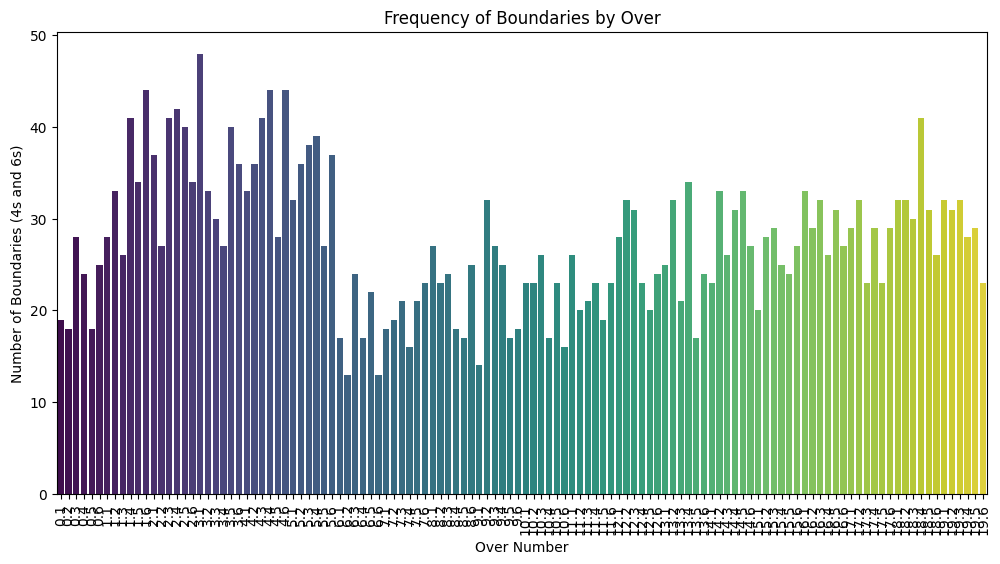

In [103]:
boundary_counts = boundary_df['over'].value_counts().reset_index()
boundary_counts.columns = ['over', 'boundary_count']
plt.figure(figsize=(12, 6))  # Set the figure size
sns.barplot(x='over', y='boundary_count', data=boundary_counts, palette='viridis')

plt.xlabel('Over Number')
plt.ylabel('Number of Boundaries (4s and 6s)')
plt.title('Frequency of Boundaries by Over')

plt.xticks(rotation=90)

plt.show()

### Now let us calculate some bowling statistics

In [ ]:
# first off, let us show how the bowler has performed throughout the tournament
